In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import scipy.interpolate as interp

In [3]:
data = pd.read_csv("table.csv")
scale_rot, scale_tr = 50, 110 
rot_field = data.I_rot * scale_rot / 50
tr_collapse_field = data.I_tr_collapse * scale_tr / 100
tr_ellipse_field = data.I_tr_ellipse * scale_tr / 100


In [4]:
def parabola_fit(x, offset, bias, amp):
    return offset + amp * np.power(x + bias, 2)

(40.0, 100.0)

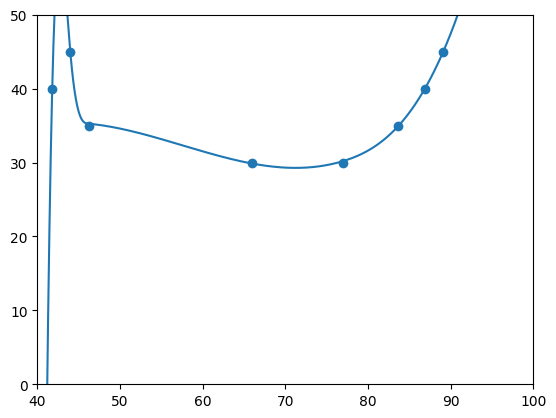

In [20]:
x = np.concatenate([rot_field, rot_field])
y = np.concatenate([tr_collapse_field, tr_ellipse_field])
mask = np.argsort(y)
x, y = x[mask], y[mask]


param, _ = curve_fit(parabola_fit,
                     y,
                     x)
y_line = np.linspace(20, 100, 1000)
x_parab = parabola_fit(y_line, *param)

interpolation = interp.UnivariateSpline(y, x, s = 0.2)(y_line)

plt.scatter(y, x)
plt.plot(y_line, interpolation)
plt.ylim(0, 50)
plt.xlim(40, 100)

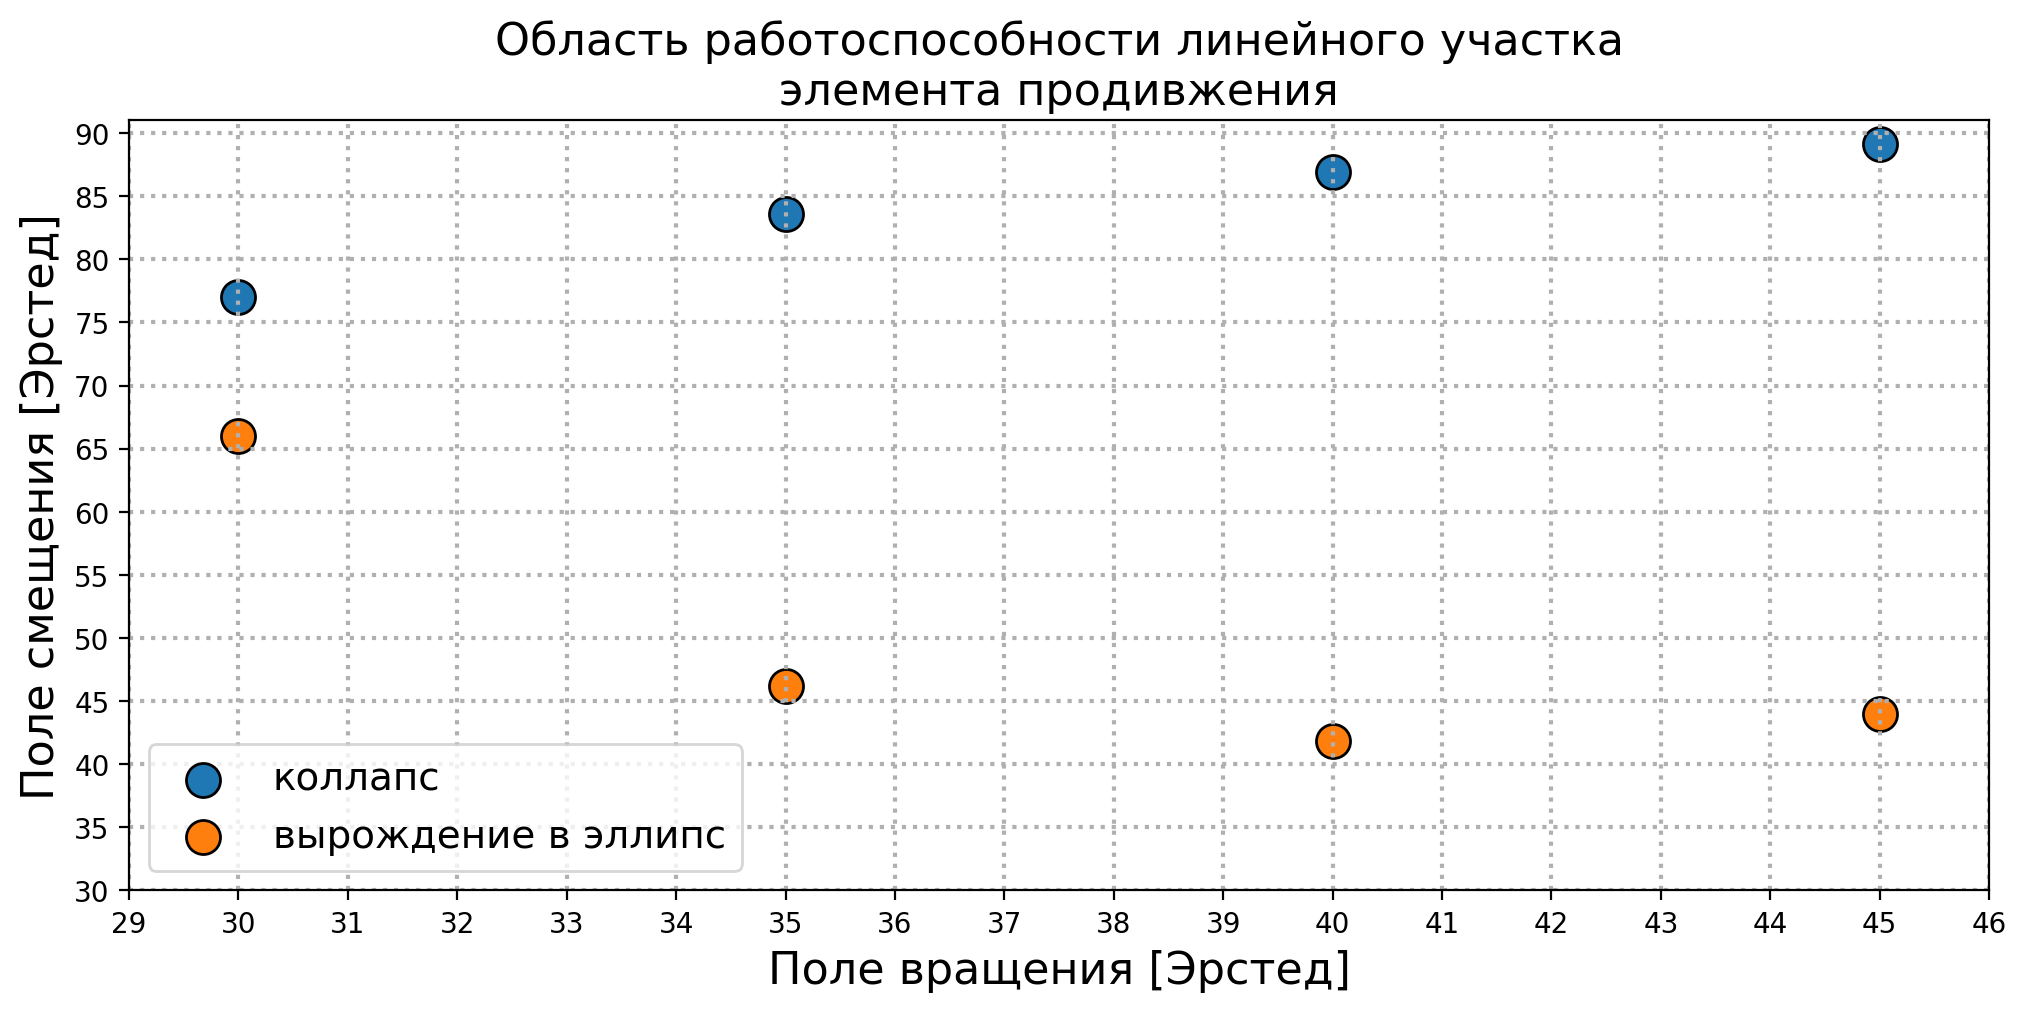

In [25]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(rot_field, tr_collapse_field, s = 150, edgecolors='black', label = 'коллапс')
plt.scatter(rot_field, tr_ellipse_field, s = 150, edgecolors='black', label = 'вырождение в эллипс')
plt.xlabel("Поле вращения [Эрстед]", fontsize = 16)
plt.ylabel("Поле смещения [Эрстед]", fontsize = 16)

plt.xticks(np.arange(14, 60, 1))
plt.yticks(np.arange(10, 100, 5))
plt.xlim(29, 46)
plt.ylim(30, 91)
plt.grid(ls = ":", linewidth = 1.5)
plt.title("Область работоспособности линейного участка\nэлемента продивжения", 
          fontsize = 16)

plt.legend(fontsize = 14, loc = 'lower left')